<a href="https://colab.research.google.com/github/MouniMuppidi/Analyzing-Food-Prices-and-their-trends/blob/main/Food_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data from CSV files
trend_data = pd.read_csv('/content/trend.csv')

In [ ]:
trend_data['Inlflation %'] = trend_data['Inlflation %'].str.replace('%', '').astype(float) / 100

In [ ]:
trend_data = trend_data.set_index('Year')

In [ ]:
trend_data['% change in banana'] = trend_data['Annual Average Price For Banana'].pct_change()*100 
trend_data['% change in cheese'] = trend_data['Annual Average Price For Cheese'].pct_change()*100  
trend_data['% change in milk'] = trend_data['Annual Average Price For Milk'].pct_change()*100  
trend_data['% change in chicken'] = trend_data['Annual Average Price For Chicken'].pct_change()*100  
trend_data['% change in pork'] = trend_data['Annual Average Price For Pork'].pct_change()*100  
trend_data['% change in eggs'] = trend_data['Annual Average Price For Eggs'].pct_change()*100  
trend_data['% change in oranges'] = trend_data['Annual Average Price For Oranges'].pct_change()*100  
trend_data['% change in strawberries'] = trend_data['Annual Average Price For Strawberries'].pct_change()*100  
trend_data['% change in tomatoes'] = trend_data['Annual Average Price For Tomatoes'].pct_change()*100  
trend_data['% change in beef steaks'] = trend_data['Annual Average Price For Beef Steaks'].pct_change()*100 
trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)

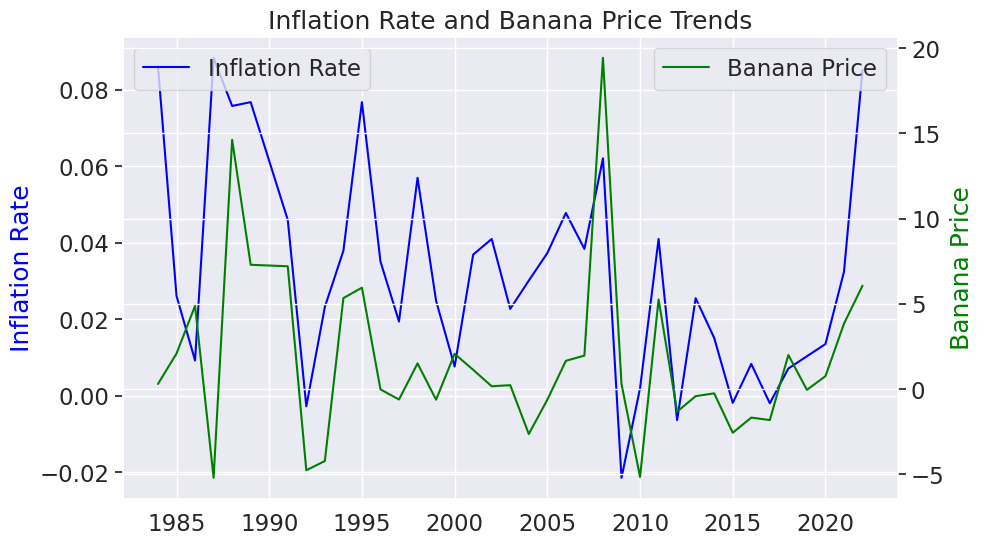

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(trend_data.index, trend_data['Inlflation %'], color='blue', label='Inflation Rate')
ax.set_ylabel('Inflation Rate', color='blue')

ax2 = ax.twinx()

ax2.plot(trend_data.index, trend_data['% change in banana'], color='green', label='Banana Price')
ax2.set_ylabel('Banana Price', color='green')

ax.set_title('Inflation Rate and Banana Price Trends')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

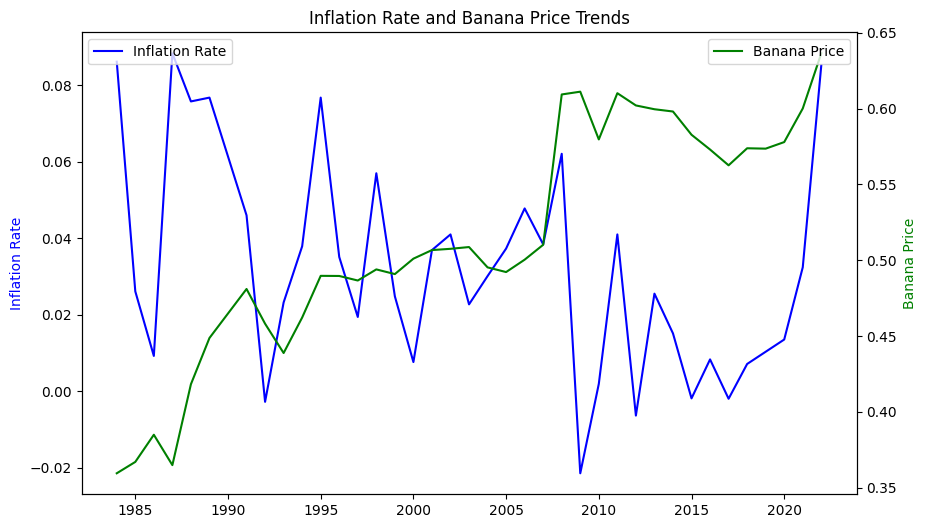

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(trend_data.index, trend_data['Inlflation %'], color='blue', label='Inflation Rate')
ax.set_ylabel('Inflation Rate', color='blue')

ax2 = ax.twinx()

ax2.plot(trend_data.index, trend_data['Annual Average Price For Banana'], color='green', label='Banana Price')
ax2.set_ylabel('Banana Price', color='green')

ax.set_title('Inflation Rate and Banana Price Trends')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
trend_data['Inlflation %'].dtype

dtype('float64')

In [ ]:
trend_data.dtypes

Annual Average Price For Cheese           float64
Annual Average Price For Milk             float64
Annual Average Price For Chedar Cheese    float64
Annual Average Price For Beef Chunks      float64
Annual Average Price For Beef Steaks      float64
Annual Average Price For Chicken          float64
Annual Average Price For Pork             float64
Annual Average Price For Eggs             float64
Annual Average Price For Bread            float64
Annual Average Price For Flour            float64
Annual Average Price For Rice             float64
Annual Average Price For Banana           float64
Annual Average Price For Oranges          float64
Annual Average Price For Strawberries     float64
Annual Average Price For Tomatoes         float64
Inlflation %                              float64
% CPI for Grains                          float64
% CPI for Fruits                          float64
%CPI for Animal Products                  float64
% CPI for Dairy Prodcuts                  float64


In [ ]:
corr = trend_data['Inlflation %'] .corr(trend_data['% change in banana'])
print('Correlation between inflation rate and banana price:', corr)

Correlation between inflation rate and banana price: 0.48190489319514285


In [ ]:
print(trend_data.columns)

Index(['Annual Average Price For Cheese', 'Annual Average Price For Milk',
       'Annual Average Price For Chedar Cheese',
       'Annual Average Price For Beef Chunks',
       'Annual Average Price For Beef Steaks',
       'Annual Average Price For Chicken', 'Annual Average Price For Pork',
       'Annual Average Price For Eggs', 'Annual Average Price For Bread',
       'Annual Average Price For Flour', 'Annual Average Price For Rice',
       'Annual Average Price For Banana', 'Annual Average Price For Oranges',
       'Annual Average Price For Strawberries',
       'Annual Average Price For Tomatoes', 'Inlflation %', '% CPI for Grains',
       '% CPI for Fruits', '%CPI for Animal Products',
       '% CPI for Dairy Prodcuts', 'AnnualCPI', '% PPI for Fruits',
       '% PPI for Vegeatables', '%PPI for Beef', '%PPI for Pork',
       '%PPI for Poultry', '% PPI for Eggs', '% PPI for Milk',
       '% PPI for Dairy ', '% PPI for Wheat', '% change in banana',
       '% change in cheese', '% 

<Axes: >

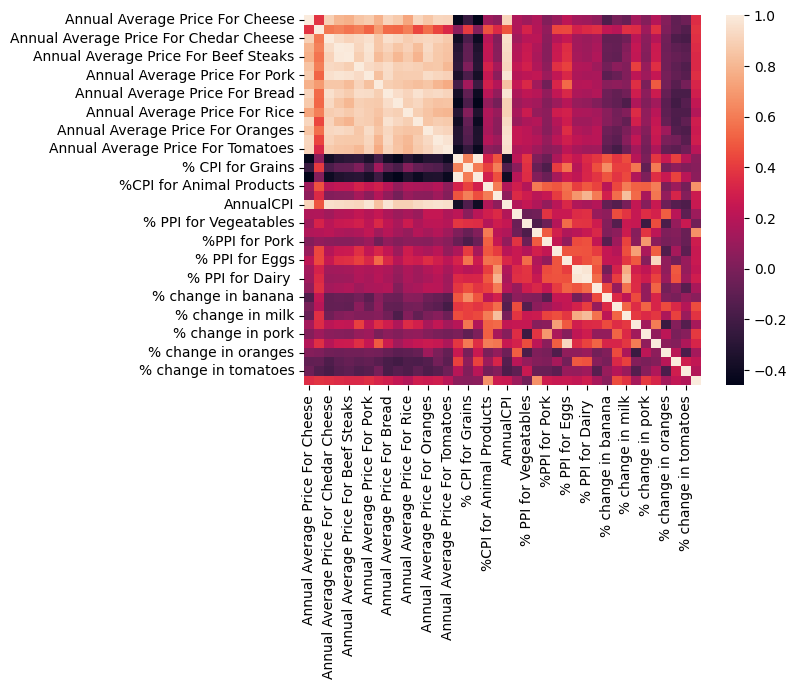

In [ ]:
import seaborn as sns
sns.heatmap(trend_data.corr())

<Axes: >

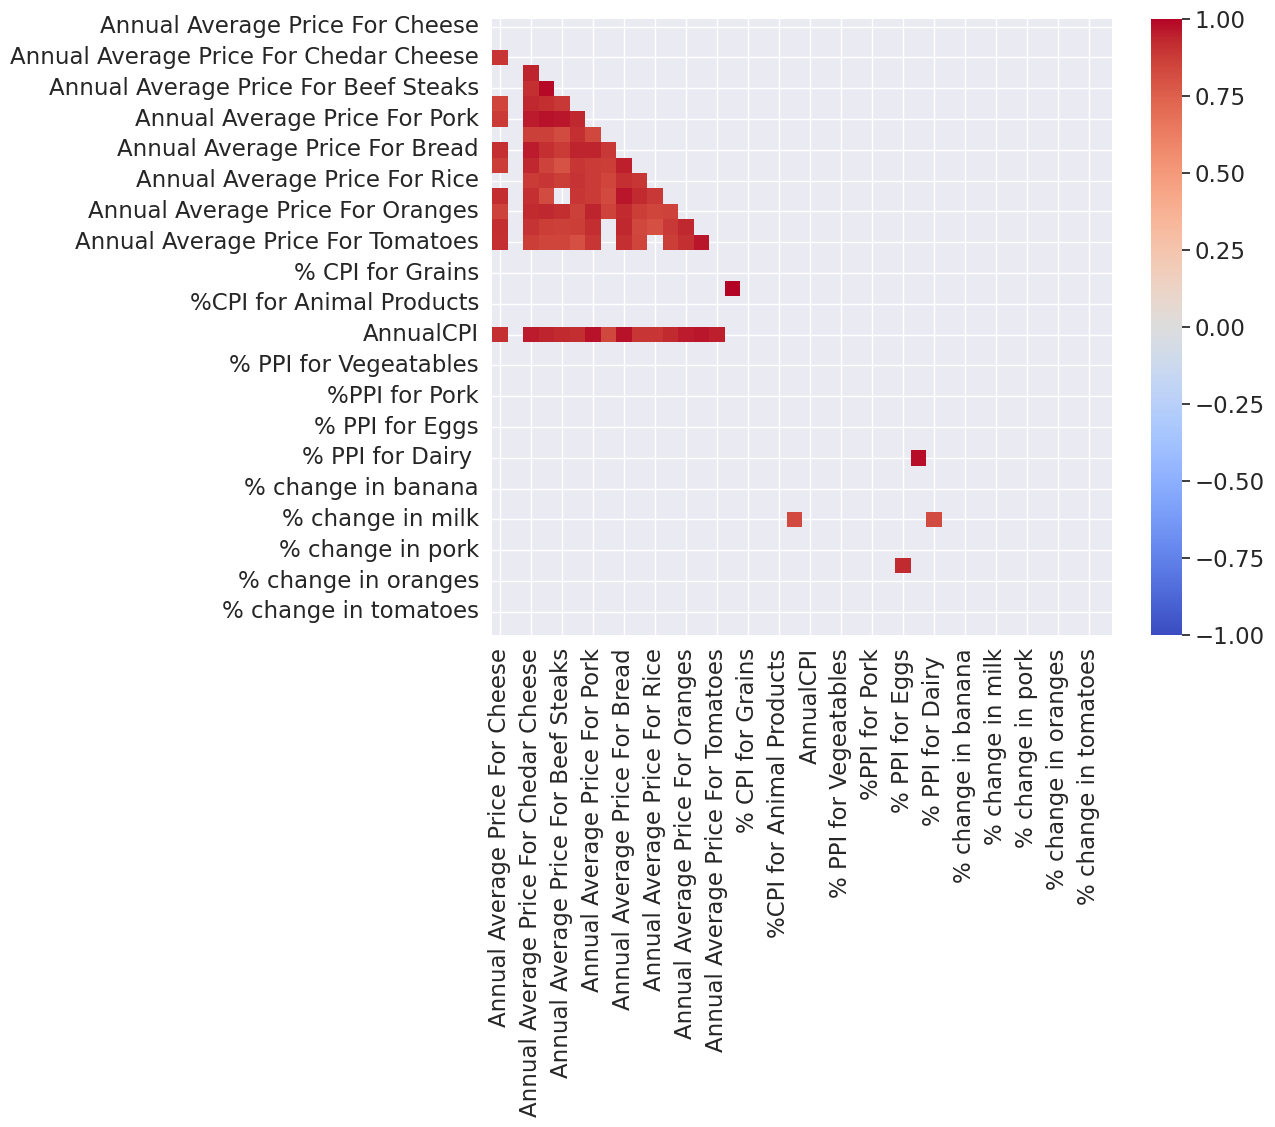

In [ ]:

import seaborn as sns
import pandas as pd
import numpy as np

# Create a correlation matrix for the dataset
corr_matrix = trend_data.corr()

# Create a mask to only show the cells with correlation > 0.6
mask = np.triu(corr_matrix)
mask[np.abs(corr_matrix) < 0.8] = True
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,8))

# Create the heatmap with labels
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, mask=mask, annot=False)

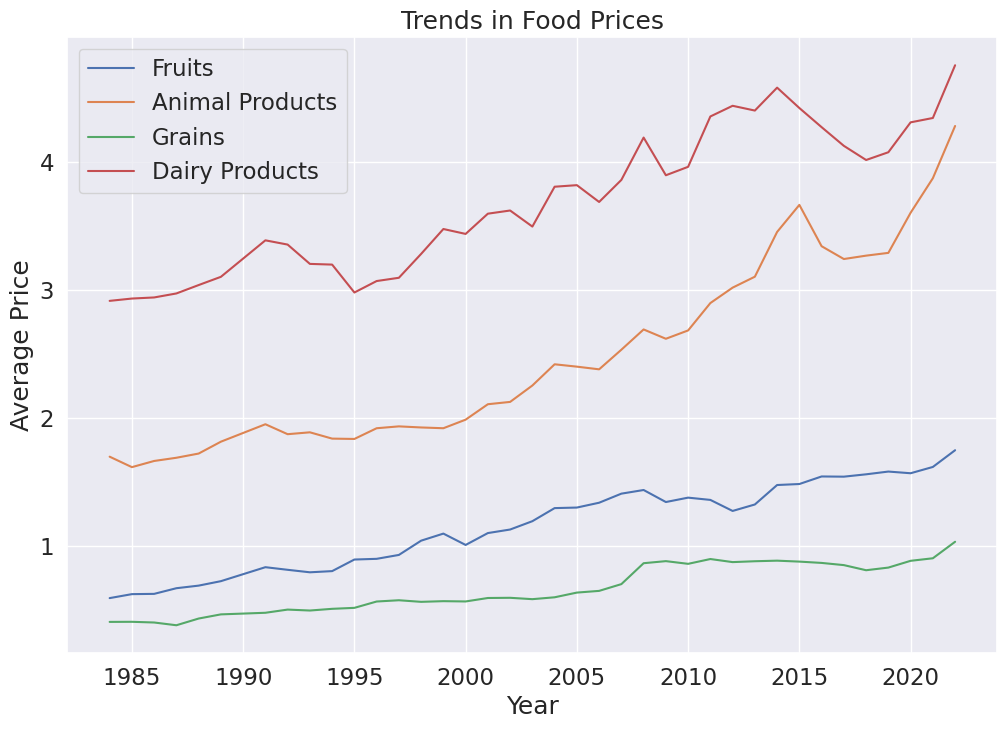

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1         group2     meandiff p-adj   lower   upper  reject
---------------------------------------------------------------------
animal_products dairy_products   1.2054    0.0  0.9102  1.5006   True
animal_products         fruits   -1.326    0.0 -1.6212 -1.0308   True
animal_products         grains  -1.8157    0.0 -2.1109 -1.5205   True
 dairy_products         fruits  -2.5314    0.0 -2.8266 -2.2362   True
 dairy_products         grains   -3.021    0.0 -3.3162 -2.7258   True
         fruits         grains  -0.4897 0.0002 -0.7848 -0.1945   True
---------------------------------------------------------------------


In [ ]:
plt.figure(figsize=(12, 8))

# Calculate the average prices for each category
fruits = trend_data[['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes']].mean(axis=1)
animal_products = trend_data[['Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs']].mean(axis=1)
grains = trend_data[['Annual Average Price For Bread', 'Annual Average Price For Flour', 'Annual Average Price For Rice']].mean(axis=1)
dairy_products = trend_data[['Annual Average Price For Cheese', 'Annual Average Price For Milk', 'Annual Average Price For Chedar Cheese']].mean(axis=1)

# Plot the trends for each category
plt.plot(trend_data.index, fruits, label='Fruits')
plt.plot(trend_data.index, animal_products, label='Animal Products')
plt.plot(trend_data.index, grains, label='Grains')
plt.plot(trend_data.index, dairy_products, label='Dairy Products')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Trends in Food Prices')
plt.legend()

# Show the plot
plt.show()
import statsmodels.stats.multicomp as mc

# Combine the data for all categories into a single array
all_data = np.concatenate([fruits, animal_products, grains, dairy_products])

# Create labels for the categories
labels = ['fruits'] * len(fruits) + ['animal_products'] * len(animal_products) + ['grains'] * len(grains) + ['dairy_products'] * len(dairy_products)

# Perform Tukey's HSD test
tukey_results = mc.pairwise_tukeyhsd(all_data, labels, alpha=0.05)

# Print the results
print(tukey_results)








In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr



# Calculate the mean for each category
fruits_mean = trend_data[['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes']].mean(axis=1)
animal_products_mean = trend_data[['Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs']].mean(axis=1)
grains_mean = trend_data[['Annual Average Price For Bread', 'Annual Average Price For Flour', 'Annual Average Price For Rice']].mean(axis=1)
dairy_products_mean = trend_data[['Annual Average Price For Cheese', 'Annual Average Price For Milk', 'Annual Average Price For Chedar Cheese']].mean(axis=1)

# Calculate the percent changes for each category
fruits_pct_change = fruits_mean.pct_change().dropna()
animal_products_pct_change = animal_products_mean.pct_change().dropna()
grains_pct_change = grains_mean.pct_change().dropna()
dairy_products_pct_change = dairy_products_mean.pct_change().dropna()

# Perform Spearman correlation analysis
spearman_corr_fruits_animal_products, spearman_pval_fruits_animal_products = spearmanr(fruits_pct_change, animal_products_pct_change)
spearman_corr_fruits_grains, spearman_pval_fruits_grains = spearmanr(fruits_pct_change, grains_pct_change)
spearman_corr_fruits_dairy_products, spearman_pval_fruits_dairy_products = spearmanr(fruits_pct_change, dairy_products_pct_change)

# Perform Pearson correlation analysis
pearson_corr_fruits_animal_products, pearson_pval_fruits_animal_products = pearsonr(fruits_pct_change, animal_products_pct_change)
pearson_corr_fruits_grains, pearson_pval_fruits_grains = pearsonr(fruits_pct_change, grains_pct_change)
pearson_corr_fruits_dairy_products, pearson_pval_fruits_dairy_products = pearsonr(fruits_pct_change, dairy_products_pct_change)
pearson_corr_animal_dairy_products, pearson_pval_dairy_animal_products = pearsonr(animal_products_pct_change, dairy_products_pct_change)


# Print the results
print("Spearman correlation between fruits and animal_products:", spearman_corr_fruits_animal_products)
print("Spearman p-value between fruits and animal_products:", spearman_pval_fruits_animal_products)
print("Spearman correlation between fruits and grains:", spearman_corr_fruits_grains)
print("Spearman p-value between fruits and grains:", spearman_pval_fruits_grains)
print("Spearman correlation between fruits and dairy_products:", spearman_corr_fruits_dairy_products)
print("Spearman p-value between fruits and dairy_products:", spearman_pval_fruits_dairy_products)
print("Pearson correlation between fruits and animal_products:", pearson_corr_fruits_animal_products)
print("Pearson p-value between fruits and animal_products:", pearson_pval_fruits_animal_products)
print("Pearson correlation between fruits and grains:", pearson_corr_fruits_grains)
print("Pearson p-value between fruits and grains:", pearson_pval_fruits_grains)
print("Pearson correlation between fruits and dairy_products:", pearson_corr_fruits_dairy_products)
print("Pearson p-value between fruits and dairy_products:", pearson_pval_fruits_dairy_products)
print("Pearson correlation between animal and dairy_products:", pearson_corr_animal_dairy_products)
print("Pearson p-value between animal and dairy_products:", pearson_pval_dairy_animal_products)







Spearman correlation between fruits and animal_products: 0.21574205784732098
Spearman p-value between fruits and animal_products: 0.1996914989305676
Spearman correlation between fruits and grains: 0.040540540540540536
Spearman p-value between fruits and grains: 0.8117008286300492
Spearman correlation between fruits and dairy_products: 0.38003793266951164
Spearman p-value between fruits and dairy_products: 0.020332778379360095
Pearson correlation between fruits and animal_products: 0.24325152436860245
Pearson p-value between fruits and animal_products: 0.1468494692107194
Pearson correlation between fruits and grains: 0.0439514081418116
Pearson p-value between fruits and grains: 0.7961794535093137
Pearson correlation between fruits and dairy_products: 0.3807031331577083
Pearson p-value between fruits and dairy_products: 0.02009622234812734
Pearson correlation between animal and dairy_products: 0.6017582596879352
Pearson p-value between animal and dairy_products: 8.159269762148487e-05


In [ ]:
from scipy.stats import pearsonr

# Choose specific fruit products for analysis
fruit_product_1 = 'Annual Average Price For Strawberries'
fruit_product_2 = 'Annual Average Price For Oranges'
fruit_product_3 = 'Annual Average Price For Tomatoes'
fruit_product_4 = 'Annual Average Price For Banana'

# Calculate the percent changes for each fruit product
fruit_product_1_pct_change = trend_data[fruit_product_1].pct_change().dropna()
fruit_product_2_pct_change = trend_data[fruit_product_2].pct_change().dropna()
fruit_product_3_pct_change = trend_data[fruit_product_3].pct_change().dropna()
fruit_product_4_pct_change = trend_data[fruit_product_4].pct_change().dropna()

# Perform Pearson correlation analysis within the fruit products category
pearson_corr_1_2, pearson_pval_1_2 = pearsonr(fruit_product_1_pct_change, fruit_product_2_pct_change)
pearson_corr_1_3, pearson_pval_1_3 = pearsonr(fruit_product_1_pct_change, fruit_product_3_pct_change)
pearson_corr_1_4, pearson_pval_1_4 = pearsonr(fruit_product_1_pct_change, fruit_product_4_pct_change)
pearson_corr_2_3, pearson_pval_2_3 = pearsonr(fruit_product_2_pct_change, fruit_product_3_pct_change)
pearson_corr_2_4, pearson_pval_2_4 = pearsonr(fruit_product_2_pct_change, fruit_product_4_pct_change)
pearson_corr_3_4, pearson_pval_3_4 = pearsonr(fruit_product_3_pct_change, fruit_product_4_pct_change)

print(f"Pearson correlation between {fruit_product_1} and {fruit_product_2}: {pearson_corr_1_2}, p-value: {pearson_pval_1_2}")
print(f"Pearson correlation between {fruit_product_1} and {fruit_product_3}: {pearson_corr_1_3}, p-value: {pearson_pval_1_3}")
print(f"Pearson correlation between {fruit_product_1} and {fruit_product_4}: {pearson_corr_1_4}, p-value: {pearson_pval_1_4}")
print(f"Pearson correlation between {fruit_product_2} and {fruit_product_3}: {pearson_corr_2_3}, p-value: {pearson_pval_2_3}")
print(f"Pearson correlation between {fruit_product_2} and {fruit_product_4}: {pearson_corr_2_4}, p-value: {pearson_pval_2_4}")
print(f"Pearson correlation between {fruit_product_3} and {fruit_product_4}: {pearson_corr_3_4}, p-value: {pearson_pval_3_4}")


Pearson correlation between Annual Average Price For Strawberries and Annual Average Price For Oranges: 0.2040107165709677, p-value: 0.22584028735428938
Pearson correlation between Annual Average Price For Strawberries and Annual Average Price For Tomatoes: 0.28697654880302076, p-value: 0.08504604386882789
Pearson correlation between Annual Average Price For Strawberries and Annual Average Price For Banana: -0.009572563691451062, p-value: 0.955158325085668
Pearson correlation between Annual Average Price For Oranges and Annual Average Price For Tomatoes: -0.16600232399879986, p-value: 0.32613414000648994
Pearson correlation between Annual Average Price For Oranges and Annual Average Price For Banana: 0.012700228026901527, p-value: 0.940529886930424
Pearson correlation between Annual Average Price For Tomatoes and Annual Average Price For Banana: 0.09214055231846947, p-value: 0.5875509274815917


In [ ]:
from scipy.stats import pearsonr

# Choose specific meat and egg products for analysis
meat_product_1 = 'Annual Average Price For Beef Chunks'
meat_product_2 = 'Annual Average Price For Beef Steaks'
meat_product_3 = 'Annual Average Price For Chicken'
meat_product_4 = 'Annual Average Price For Pork'
egg_product = 'Annual Average Price For Eggs'

# Calculate the percent changes for each meat and egg product
meat_product_1_pct_change = trend_data[meat_product_1].pct_change().dropna()
meat_product_2_pct_change = trend_data[meat_product_2].pct_change().dropna()
meat_product_3_pct_change = trend_data[meat_product_3].pct_change().dropna()
meat_product_4_pct_change = trend_data[meat_product_4].pct_change().dropna()
egg_product_pct_change = trend_data[egg_product].pct_change().dropna()

# Perform Pearson correlation analysis within the meat and egg products category
pearson_corr_1_2, pearson_pval_1_2 = pearsonr(meat_product_1_pct_change, meat_product_2_pct_change)
pearson_corr_1_3, pearson_pval_1_3 = pearsonr(meat_product_1_pct_change, meat_product_3_pct_change)
pearson_corr_1_4, pearson_pval_1_4 = pearsonr(meat_product_1_pct_change, meat_product_4_pct_change)
pearson_corr_1_eggs, pearson_pval_1_eggs = pearsonr(meat_product_1_pct_change, egg_product_pct_change)
pearson_corr_2_3, pearson_pval_2_3 = pearsonr(meat_product_2_pct_change, meat_product_3_pct_change)
pearson_corr_2_4, pearson_pval_2_4 = pearsonr(meat_product_2_pct_change, meat_product_4_pct_change)
pearson_corr_2_eggs, pearson_pval_2_eggs = pearsonr(meat_product_2_pct_change, egg_product_pct_change)
pearson_corr_3_4, pearson_pval_3_4 = pearsonr(meat_product_3_pct_change, meat_product_4_pct_change)
pearson_corr_3_eggs, pearson_pval_3_eggs = pearsonr(meat_product_3_pct_change, egg_product_pct_change)
pearson_corr_4_eggs, pearson_pval_4_eggs = pearsonr(meat_product_4_pct_change, egg_product_pct_change)

print(f"Pearson correlation between {meat_product_1} and {meat_product_2}: {pearson_corr_1_2}, p-value: {pearson_pval_1_2}")
print(f"Pearson correlation between {meat_product_1} and {meat_product_3}: {pearson_corr_1_3}, p-value: {pearson_pval_1_3}")
print(f"Pearson correlation between {meat_product_1} and {meat_product_4}: {pearson_corr_1_4}, p-value: {pearson_pval_1_4}")
print(f"Pearson correlation between {meat_product_1} and {egg_product}: {pearson_corr_1_eggs}, p-value: {pearson_pval_1_eggs}")
print(f"Pearson correlation between {meat_product_2} and {meat_product_3}: {pearson_corr_2_3}, p-value: {pearson_pval_2_3}")
print(f"Pearson correlation between {meat_product_2} and {meat_product_4}: {pearson_corr_2_4}, p-value: {pearson_pval_2_4}")
print(f"Pearson correlation between {meat_product_2} and {egg_product}: {pearson_corr_2_eggs}, p-value: {pearson_pval_2_eggs}")
print(f"Pearson correlation between {meat_product_3} and {meat_product_4}: {pearson_corr_3_4}, p-value: {pearson_pval_3_4}")
print(f"Pearson correlation between {meat_product_3} and {egg_product}: {pearson_corr_3_eggs}, p-value: {pearson_pval_3_eggs}")
print(f"Pearson correlation between {meat_product_4} and {egg_product}: {pearson_corr_4_eggs}, p-value: {pearson_pval_4_eggs}")




Pearson correlation between Annual Average Price For Beef Chunks and Annual Average Price For Beef Steaks: 0.907293859687093, p-value: 9.960372619453468e-15
Pearson correlation between Annual Average Price For Beef Chunks and Annual Average Price For Chicken: 0.2752129013078643, p-value: 0.09922800603407478
Pearson correlation between Annual Average Price For Beef Chunks and Annual Average Price For Pork: 0.3697357549942612, p-value: 0.024303081950449928
Pearson correlation between Annual Average Price For Beef Chunks and Annual Average Price For Eggs: 0.41373545532412537, p-value: 0.010912708808558765
Pearson correlation between Annual Average Price For Beef Steaks and Annual Average Price For Chicken: 0.14406545111820498, p-value: 0.39494210535790225
Pearson correlation between Annual Average Price For Beef Steaks and Annual Average Price For Pork: 0.40051649046366355, p-value: 0.014032236508212935
Pearson correlation between Annual Average Price For Beef Steaks and Annual Average Pr

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Extract the columns of interest
bread_column = trend_data['Annual Average Price For Bread']
flour_column = trend_data['Annual Average Price For Flour']
rice_column = trend_data['Annual Average Price For Rice']

# Calculate the percentage changes for each column
bread_pct_change = bread_column.pct_change().dropna()
flour_pct_change = flour_column.pct_change().dropna()
rice_pct_change = rice_column.pct_change().dropna()

# Calculate the Pearson correlation coefficients and p-values
pearson_corr_bread_flour, pearson_pval_bread_flour = pearsonr(bread_pct_change, flour_pct_change)
pearson_corr_bread_rice, pearson_pval_bread_rice = pearsonr(bread_pct_change, rice_pct_change)
pearson_corr_flour_rice, pearson_pval_flour_rice = pearsonr(flour_pct_change, rice_pct_change)
pearson_corr_bread_rice, pearson_pval_bread_rice = pearsonr(bread_pct_change, rice_pct_change)

# Print the results
print(f"Pearson correlation between Bread and Flour: {pearson_corr_bread_flour}, p-value: {pearson_pval_bread_flour}")
print(f"Pearson correlation between Bread and Rice: {pearson_corr_bread_rice}, p-value: {pearson_pval_bread_rice}")
print(f"Pearson correlation between Flour and Rice: {pearson_corr_flour_rice}, p-value: {pearson_pval_flour_rice}")
print(f"Pearson correlation between Bread and Rice: {pearson_corr_bread_rice}, p-value: {pearson_pval_bread_rice}")


Pearson correlation between Bread and Flour: 0.6511324179556575, p-value: 1.2768000320764457e-05
Pearson correlation between Bread and Rice: 0.4170261611453245, p-value: 0.010235037221946509
Pearson correlation between Flour and Rice: 0.5880377383133503, p-value: 0.0001295575261069812
Pearson correlation between Bread and Rice: 0.4170261611453245, p-value: 0.010235037221946509


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Extract the columns of interest from trend_data
dairy_product_1 = 'Annual Average Price For Cheese'
dairy_product_2 = 'Annual Average Price For Milk'
dairy_product_3 = 'Annual Average Price For Chedar Cheese'

# Calculate the percentage changes for each dairy product
dairy_product_1_pct_change = trend_data[dairy_product_1].pct_change().dropna()
dairy_product_2_pct_change = trend_data[dairy_product_2].pct_change().dropna()
dairy_product_3_pct_change = trend_data[dairy_product_3].pct_change().dropna()

# Calculate Pearson correlation coefficients and p-values
pearson_corr_1_2, pearson_pval_1_2 = pearsonr(dairy_product_1_pct_change, dairy_product_2_pct_change)
pearson_corr_1_3, pearson_pval_1_3 = pearsonr(dairy_product_1_pct_change, dairy_product_3_pct_change)
pearson_corr_2_3, pearson_pval_2_3 = pearsonr(dairy_product_2_pct_change, dairy_product_3_pct_change)

# Print the results
print(f"Pearson correlation between {dairy_product_1} and {dairy_product_2}: {pearson_corr_1_2}, p-value: {pearson_pval_1_2}")
print(f"Pearson correlation between {dairy_product_1} and {dairy_product_3}: {pearson_corr_1_3}, p-value: {pearson_pval_1_3}")
print(f"Pearson correlation between {dairy_product_2} and {dairy_product_3}: {pearson_corr_2_3}, p-value: {pearson_pval_2_3}")


Pearson correlation between Annual Average Price For Cheese and Annual Average Price For Milk: 0.46514268835499684, p-value: 0.0037223043261763343
Pearson correlation between Annual Average Price For Cheese and Annual Average Price For Chedar Cheese: 0.5195348861994569, p-value: 0.0009832576427874335
Pearson correlation between Annual Average Price For Milk and Annual Average Price For Chedar Cheese: 0.3214773658124838, p-value: 0.052354763793847583


<Figure size 1200x800 with 0 Axes>

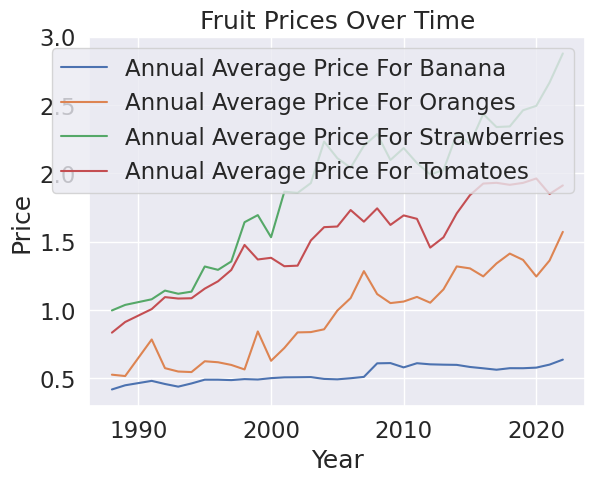

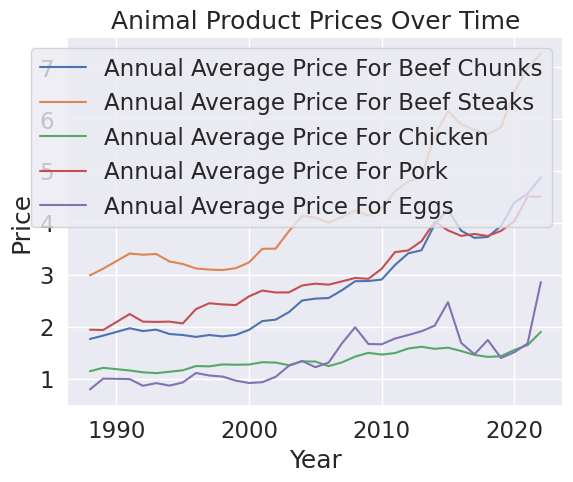

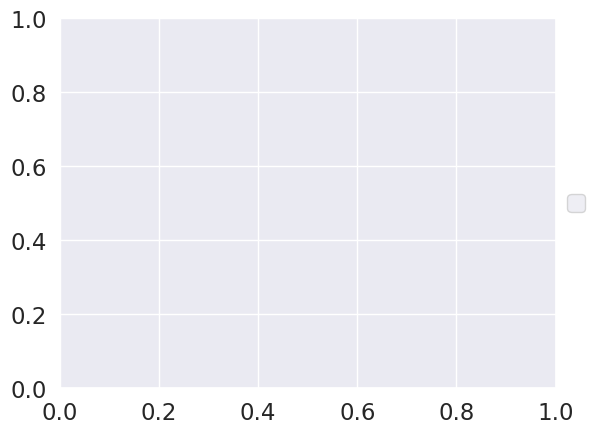

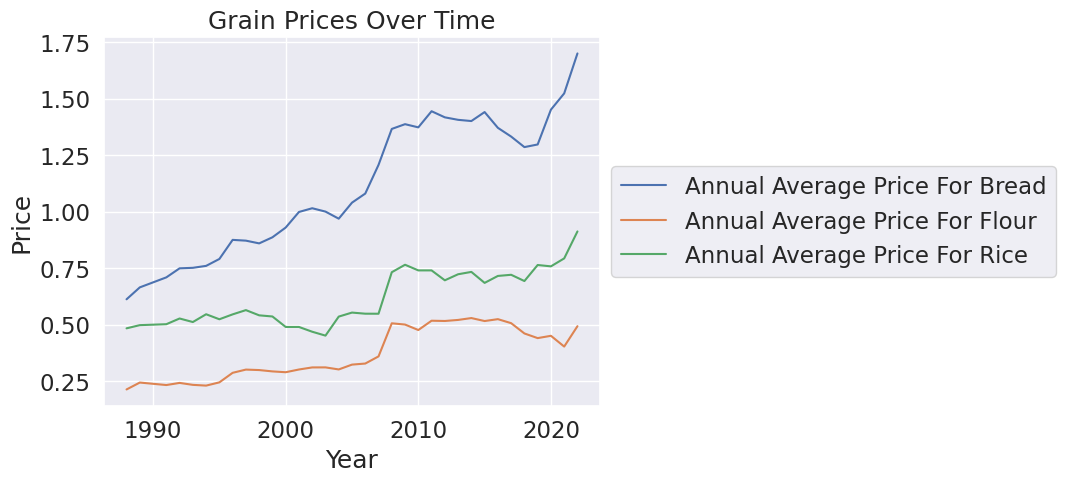

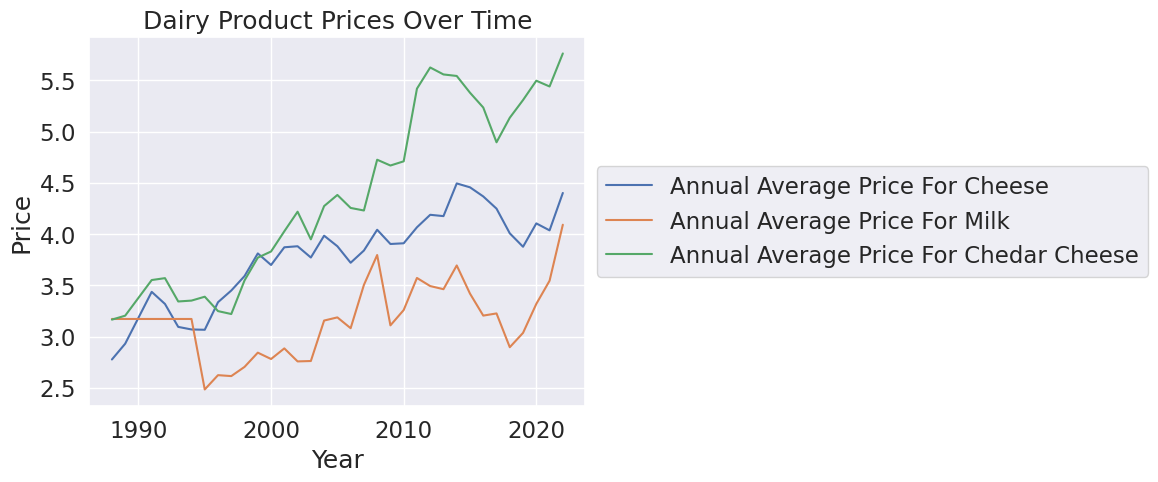

                                        Annual Average Price For Banana  \
Annual Average Price For Banana                                1.000000   
Annual Average Price For Oranges                               0.841431   
Annual Average Price For Strawberries                          0.835596   
Annual Average Price For Tomatoes                              0.805082   
Annual Average Price For Beef Chunks                           0.849374   
Annual Average Price For Beef Steaks                           0.791638   
Annual Average Price For Chicken                               0.918141   
Annual Average Price For Pork                                  0.873687   
Annual Average Price For Eggs                                  0.866936   
Annual Average Price For Bread                                 0.964532   
Annual Average Price For Flour                                 0.946430   
Annual Average Price For Rice                                  0.906668   
Annual Average Price For 

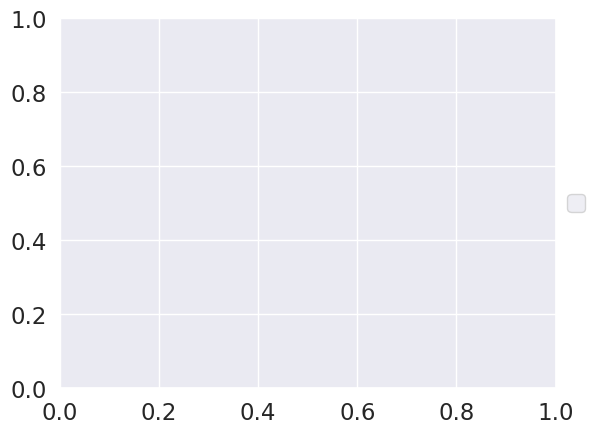

In [ ]:
from scipy.stats import f_oneway
plt.figure(figsize=(12, 8))

# Extract columns for each product category
fruits = trend_data[['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes']]
animal_products = trend_data[['Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs']]
grains = trend_data[['Annual Average Price For Bread', 'Annual Average Price For Flour', 'Annual Average Price For Rice']]
dairy_products = trend_data[['Annual Average Price For Cheese', 'Annual Average Price For Milk', 'Annual Average Price For Chedar Cheese']]

# Plot the trends for each product category
fruits.plot(y=['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes'], kind='line')
plt.title('Fruit Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

animal_products.plot(y=['Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs'], kind='line')
plt.title('Animal Product Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

grains.plot(y=['Annual Average Price For Bread', 'Annual Average Price For Flour', 'Annual Average Price For Rice'], kind='line')
plt.title('Grain Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


dairy_products.plot(y=['Annual Average Price For Cheese', 'Annual Average Price For Milk', 'Annual Average Price For Chedar Cheese'], kind='line')
plt.title('Dairy Product Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Calculate correlations between the product categories
corr_matrix = trend_data[['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes', 'Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs', 'Annual Average Price For Bread', 'Annual Average Price For Flour', 'Annual Average Price For Rice', 'Annual Average Price For Cheese', 'Annual Average Price For Milk', 'Annual Average Price For Chedar Cheese']].corr()
print(corr_matrix)



<Figure size 1000x600 with 0 Axes>

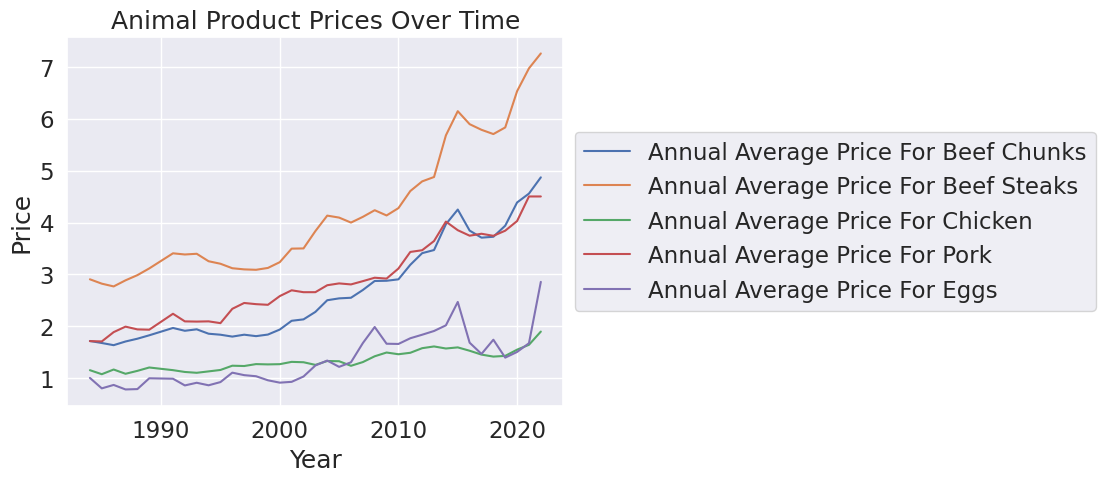

In [ ]:
plt.figure(figsize=(10, 6))
animal_products.plot(y=['Annual Average Price For Beef Chunks', 'Annual Average Price For Beef Steaks', 'Annual Average Price For Chicken', 'Annual Average Price For Pork', 'Annual Average Price For Eggs'], kind='line')
plt.title('Animal Product Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


<Figure size 1000x600 with 0 Axes>

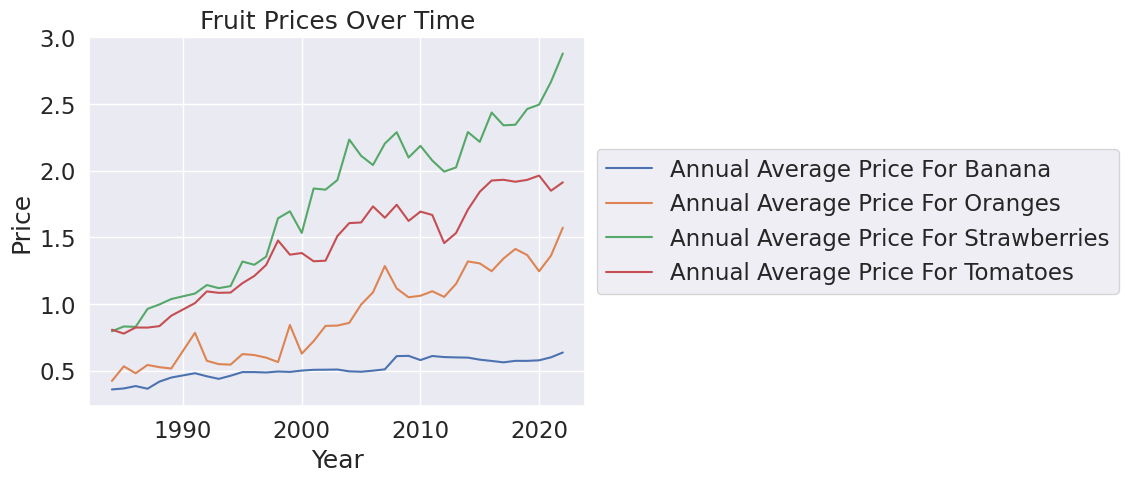

In [ ]:
# Plot the trends for each product category
plt.figure(figsize=(10, 6))
fruits.plot(y=['Annual Average Price For Banana', 'Annual Average Price For Oranges', 'Annual Average Price For Strawberries', 'Annual Average Price For Tomatoes'], kind='line')
plt.title('Fruit Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

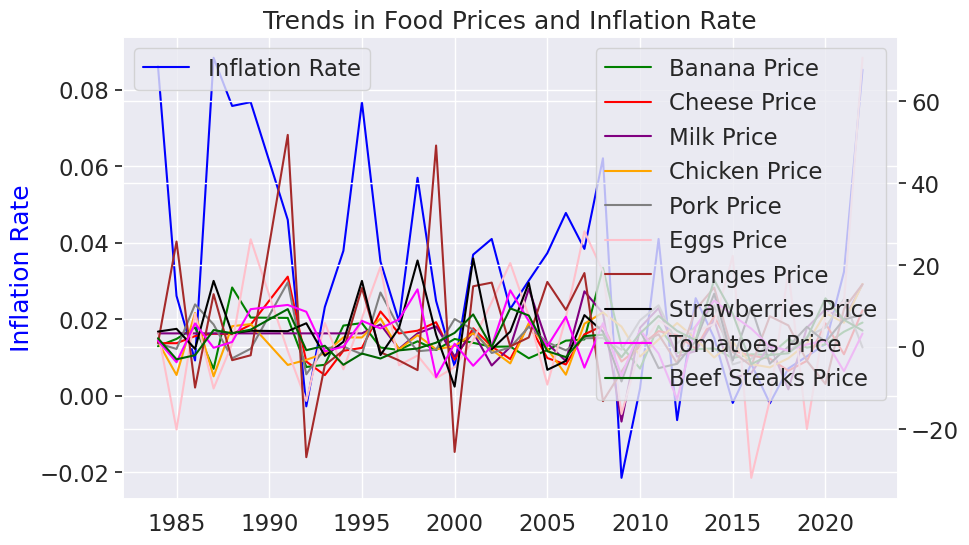

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Plot inflation rate
ax.plot(trend_data.index, trend_data['Inlflation %'], color='blue', label='Inflation Rate')
ax.set_ylabel('Inflation Rate', color='blue')

# Create secondary y-axis
ax2 = ax.twinx()

# Plot banana price
ax2.plot(trend_data.index, trend_data['% change in banana'], color='green', label='Banana Price')
# Plot other food items on secondary y-axis
ax2.plot(trend_data.index, trend_data['% change in cheese'], color='red', label='Cheese Price')
ax2.plot(trend_data.index, trend_data['% change in milk'], color='purple', label='Milk Price')
ax2.plot(trend_data.index, trend_data['% change in chicken'], color='orange', label='Chicken Price')
ax2.plot(trend_data.index, trend_data['% change in pork'], color='gray', label='Pork Price')
ax2.plot(trend_data.index, trend_data['% change in eggs'], color='pink', label='Eggs Price')
ax2.plot(trend_data.index, trend_data['% change in oranges'], color='brown', label='Oranges Price')
ax2.plot(trend_data.index, trend_data['% change in strawberries'], color='black', label='Strawberries Price')
ax2.plot(trend_data.index, trend_data['% change in tomatoes'], color='magenta', label='Tomatoes Price')
ax2.plot(trend_data.index, trend_data['% change in beef steaks'], color='darkgreen', label='Beef Steaks Price')

ax.set_title('Trends in Food Prices and Inflation Rate')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
import numpy as np
corr_dict = {}
for col in trend_data.columns[:-1]:
    corr_dict[col] = np.corrcoef(trend_data[col], trend_data['Inlflation %'])[0][1]

# Sort the correlations in descending order
sorted_corr = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)

# Print the correlations
for item in sorted_corr:
    print(f"{item[0]}: {item[1]}")

Inlflation %: 0.9999999999999999
% CPI for Fruits: 0.9982940754370524
% CPI for Grains: 0.6215665378932054
% change in banana: 0.4819048931951429
% CPI for Dairy Prodcuts: 0.48057086415218675
% change in milk: 0.45541239402481115
% change in strawberries: 0.424066741793815
% change in eggs: 0.38958601550746313
% PPI for Wheat: 0.3890207081877528
% change in cheese: 0.38753094068566935
% PPI for Vegeatables: 0.3860390530090526
% PPI for Dairy : 0.34368341975097605
% PPI for Eggs: 0.31490890296908663
%CPI for Animal Products: 0.30978718983344306
% change in oranges: 0.2607142174246473
% PPI for Milk: 0.2433678690575971
% PPI for Fruits: 0.2150287372662804
% change in tomatoes: 0.2019880772996067
% change in chicken: 0.20097982704631318
%PPI for Poultry: 0.16303009820146017
Annual Average Price For Milk: 0.05451981657564461
%PPI for Beef: 0.008938900976302028
% change in pork: -0.0004384925997340442
%PPI for Pork: -0.0619224475225854
Annual Average Price For Eggs: -0.1873083411751904
Annu

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Prepare the data
X = trend_data[['Inlflation %', '%PPI for Beef', '%CPI for Animal Products']]
y = trend_data['% change in beef steaks']

# Split data into training and testing sets
train = X.loc[X.index < 2022].copy()
test = X.loc[X.index == 2022].copy()

X_train, X_test = train, test
y_train, y_test = y.loc[y.index < 2022].copy(), y.loc[y.index == 2022].copy()

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")
# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [ 0.066],
    '%PPI for Beef': [ 1.86],
    '%CPI for Animal Products': [ 6.4]
})
predictions = model.predict(new_data)
print(predictions)

RMSE: 0.6073158873083822
[4.729853]


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)
# Prepare the data
X = trend_data[['Inlflation %', '%PPI for Beef', '%CPI for Animal Products']]
y = trend_data['% change in beef steaks']

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [ 0.066],
    '%PPI for Beef': [ 1.86],
    '%CPI for Animal Products': [ 6.4]
})
predictions = model.predict(new_data)
print(predictions)
 

RMSE: 3.907803921920234
[5.2991047]


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)
# Prepare the data
X = trend_data[['Inlflation %', '% PPI for Milk', '% CPI for Dairy Prodcuts']]
y = trend_data['% change in milk']

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [ 0.066],
    '% PPI for Milk': [-13.3],
    '% CPI for Dairy Prodcuts': [12.3]
})
predictions = model.predict(new_data)
print(predictions)
 

RMSE: 5.926645920834303
[2.8293834]


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)
# Prepare the data
X = trend_data[['Inlflation %', '% PPI for Fruits', '% CPI for Fruits']]
y = trend_data['% change in tomatoes']

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [ 0.066],
    '% PPI for Fruits': [3.5],
    '% CPI for Fruits': [2.6]
})
predictions = model.predict(new_data)
print(predictions)

RMSE: 4.741906053694942
[5.26589]


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error

trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)
# Prepare the data
X = trend_data[['Inlflation %', '% PPI for Wheat', '% CPI for Grains']]
y = trend_data['% change in tomatoes']

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [ 0.066],
    '% PPI for Wheat': [-12.6],
    '% CPI for Grains': [14.6]
})
predictions = model.predict(new_data)
print(predictions)

RMSE: 4.303157651865794
[8.769366]


In [ ]:

import pandas as pd
import xgboost as xgb

trend_data.fillna(method='ffill', inplace=True)
trend_data.fillna(trend_data.median(), inplace=True)

# Prepare the data
X = trend_data[['Inlflation %', '%PPI for Beef', '%CPI for Animal Products']]
y = trend_data['% change in beef steaks']

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model with all data
model.fit(X, y)

# Make predictions for 2023 and 2024
new_data = pd.DataFrame({
    'Inlflation %': [0.066, 0.066],
    '%PPI for Beef': [1.86, 1.86],
    '%CPI for Animal Products': [6.4, 6.4]
})
predictions = model.predict(new_data)
print(predictions)

[4.52435 4.52435]


In [ ]:
# Create a RandomForestRegressor model
# Prepare the data
from sklearn.ensemble import RandomForestRegressor
X = trend_data[['Inlflation %', '%PPI for Beef', '%CPI for Animal Products']]
y = trend_data['% change in beef steaks']
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on all data
model.fit(X, y)

# Make predictions for 2023 
new_data = pd.DataFrame({
    'Inlflation %': [0.066],
    '%PPI for Beef': [1.86],
    '%CPI for Animal Products': [6.4]
})
predictions = model.predict(new_data)
print(predictions)

[5.00418782]


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
data = trend_data

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# Create lagged variables
for i in range(1, 5):
    train_data[f'Price Lag {i}'] = train_data['Annual Average Price For Beef Steaks'].shift(i)
    test_data[f'Price Lag {i}'] = test_data['Annual Average Price For Beef Steaks'].shift(i)

# Remove NaN values
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Prepare the data
X_train = train_data.drop(columns=['Annual Average Price For Beef Steaks'])
y_train = train_data['Annual Average Price For Beef Steaks']
X_test = test_data.drop(columns=['Annual Average Price For Beef Steaks'])
y_test = test_data['Annual Average Price For Beef Steaks']

# Create an XGBoost regressor model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Create lagged variables for predicting future values
for i in range(1, 5):
    data[f'Price Lag {i}'] = data['Annual Average Price For Beef Steaks'].shift(i)

# Remove NaN values
data.dropna(inplace=True)

# Prepare the data for predicting future values
X = data.drop(columns=['Annual Average Price For Beef Steaks'])
y = data['Annual Average Price For Beef Steaks']

# Predict future values
future_data = pd.DataFrame(index=pd.date_range('2023-01-01', '2024-12-31', freq='YS'), columns=X.columns)
for i, date in enumerate(future_data.index):
    if i == 0:
        future_data.iloc[i] = X.iloc[-1]
    else:
        # Create lagged variables
        for j in range(1, 5):
            future_data.iloc[i, j-1] = future_data.iloc[i-1, j-1]
        # Add the predicted value for the current year
        X_pred = future_data.iloc[i-1].values.reshape(1, -1)
        y_pred = model.predict(X_pred)
        future_data.iloc[i, -1] = y_pred[0]

# Print the predicted values
print(future_data)

<ipython-input-47-e2801d060500>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'Price Lag {i}'] = train_data['Annual Average Price For Beef Steaks'].shift(i)
<ipython-input-47-e2801d060500>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'Price Lag {i}'] = test_data['Annual Average Price For Beef Steaks'].shift(i)
<ipython-input-47-e2801d060500>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

RMSE: 1.9301323304011293
           Annual Average Price For Cheese Annual Average Price For Milk  \
2023-01-01                           4.401                         4.091   
2024-01-01                           4.401                         4.091   

           Annual Average Price For Chedar Cheese  \
2023-01-01                               5.762333   
2024-01-01                               5.762333   

           Annual Average Price For Beef Chunks  \
2023-01-01                               4.8715   
2024-01-01                               4.8715   

           Annual Average Price For Chicken Annual Average Price For Pork  \
2023-01-01                            1.898                       4.50315   
2024-01-01                              NaN                           NaN   

           Annual Average Price For Eggs Annual Average Price For Bread  \
2023-01-01                      2.856833                        1.70025   
2024-01-01                           NaN          

<Axes: xlabel='Year'>

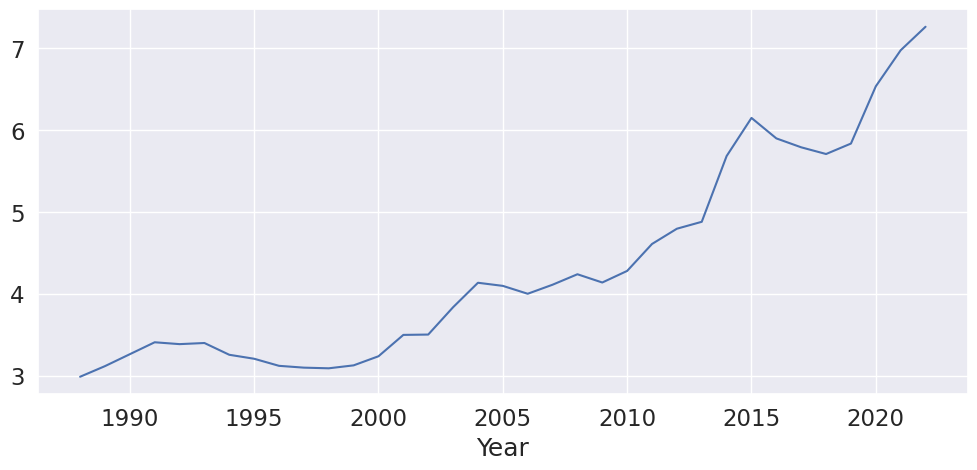

In [ ]:
trend_data['Annual Average Price For Beef Steaks'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(trend_data['Annual Average Price For Beef Steaks'])

1. ADF :  2.0092524046779836
2. P-Value :  0.9986848537403098
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression: 29
5. Critical Values :
	 1% :  -3.6790595944893187
	 5% :  -2.9678817237279103
	 10% :  -2.6231583472057074


<Axes: >

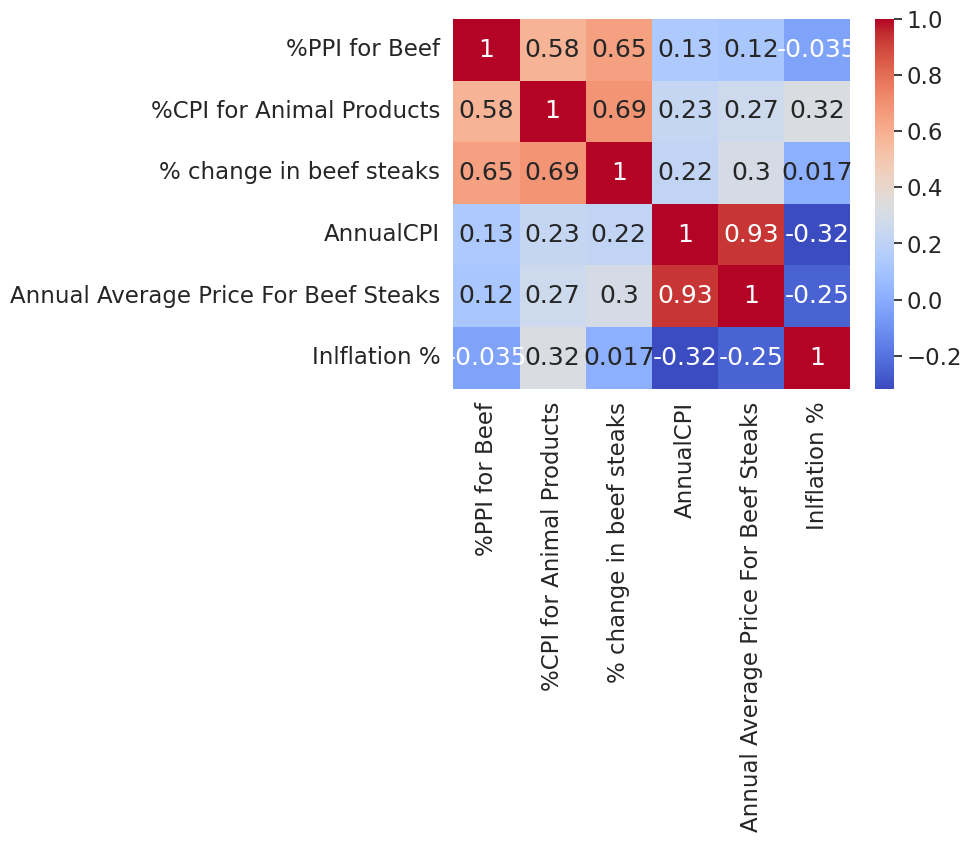

In [ ]:
import seaborn as sns
# Select the columns of interest
subset = trend_data[['%PPI for Beef', '%CPI for Animal Products', '% change in beef steaks','AnnualCPI','Annual Average Price For Beef Steaks','Inlflation %']]

# Compute the correlation matrix
corr = subset.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

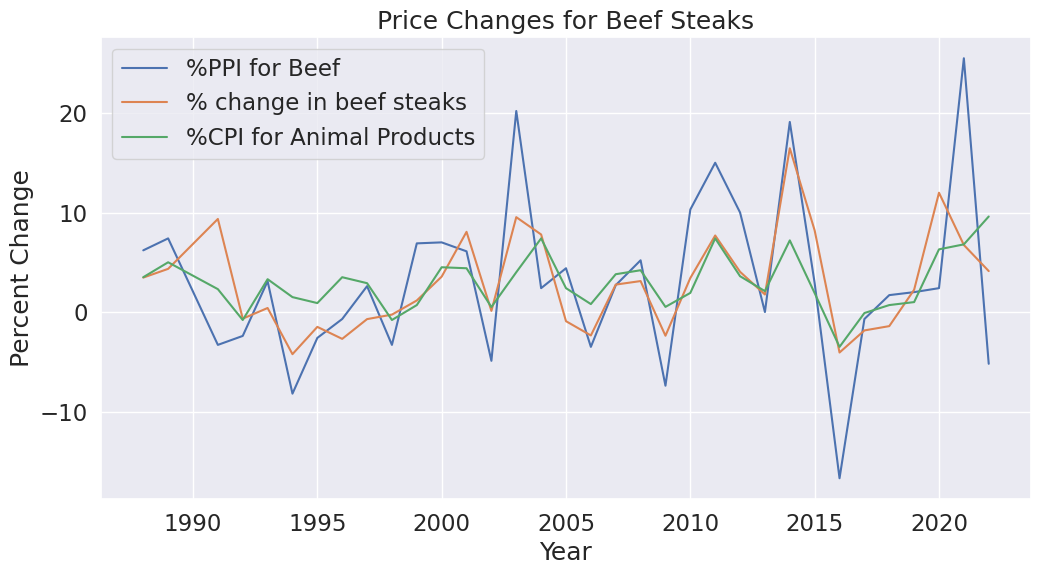

In [ ]:

import matplotlib.pyplot as plt

# Define the figure size and font size
fig, ax = plt.subplots(figsize=(12, 6))
plt.rcParams.update({'font.size': 14})

# Plot each column as a separate line

ax.plot(trend_data.index, trend_data['%PPI for Beef'], label='%PPI for Beef')
ax.plot(trend_data.index, trend_data['% change in beef steaks'], label='% change in beef steaks')
ax.plot(trend_data.index, trend_data['%CPI for Animal Products'], label='%CPI for Animal Products')


# Set the x-axis label, y-axis label, and title
ax.set_xlabel('Year')
ax.set_ylabel('Percent Change')
ax.set_title('Price Changes for Beef Steaks')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()




<Axes: >

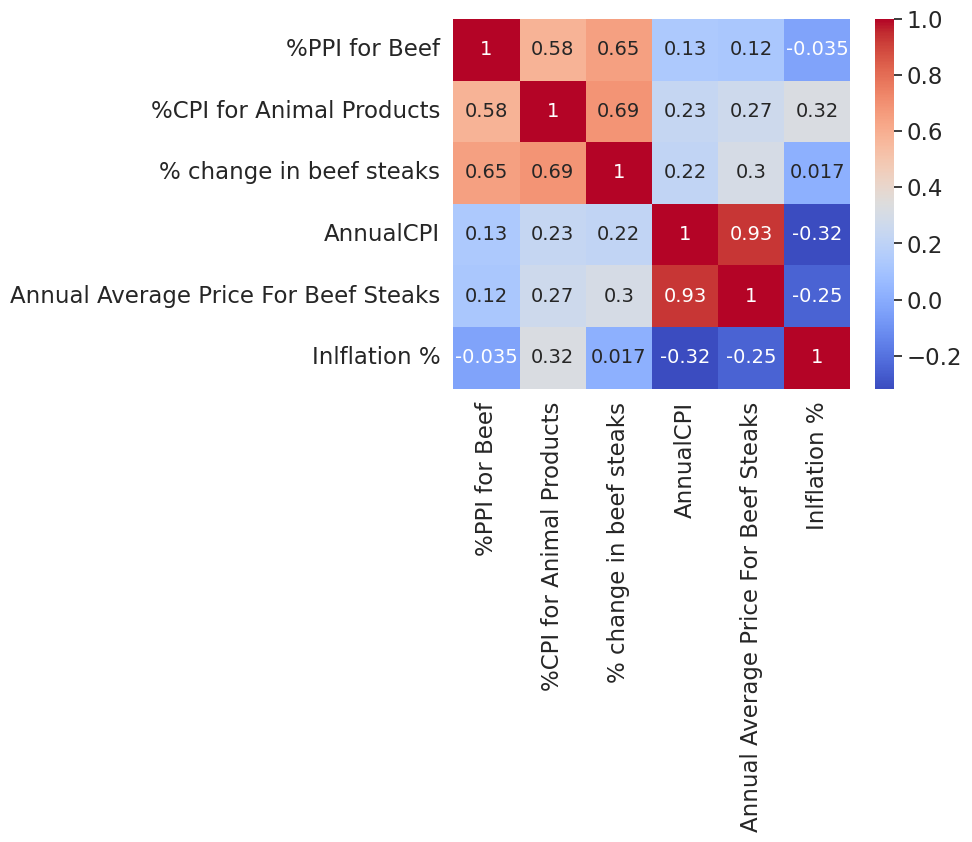

In [ ]:
import seaborn as sns
# Select the columns of interest
subset = trend_data[['%PPI for Beef', '%CPI for Animal Products', '% change in beef steaks','AnnualCPI','Annual Average Price For Beef Steaks','Inlflation %']]

# Compute the correlation matrix
corr = subset.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)

<ipython-input-54-6e0b4a10a554>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWa

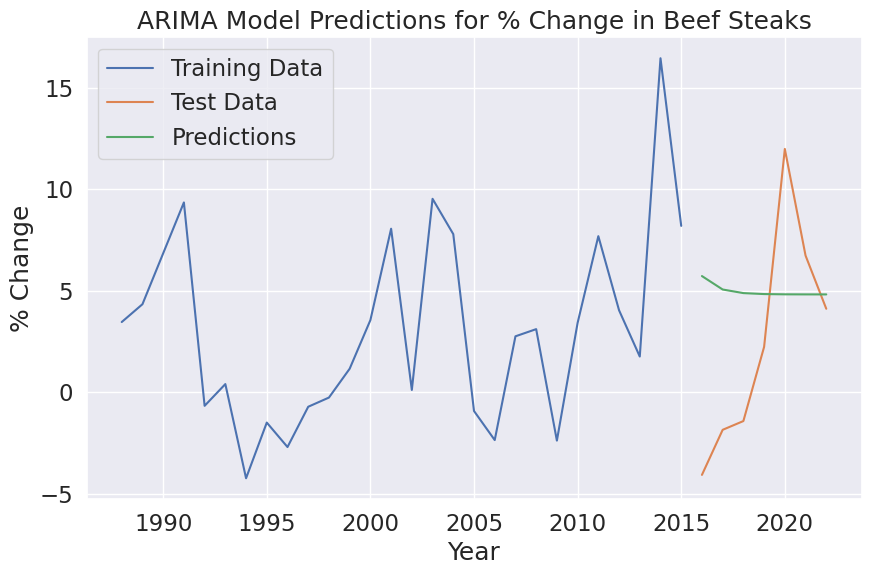

Forecast for 2023:
 27    5.726363
28    5.064476
29    4.887246
30    4.839790
31    4.827083
32    4.823680
33    4.822769
34    4.822525
35    4.822460
36    4.822443
37    4.822438
38    4.822437
Name: predicted_mean, dtype: float64

Forecast for 2024:
 39    4.822436
40    4.822436
41    4.822436
42    4.822436
43    4.822436
44    4.822436
45    4.822436
46    4.822436
47    4.822436
48    4.822436
49    4.822436
50    4.822436
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Create the subset dataframe
import statsmodels.api as sm
subset = trend_data[['%PPI for Beef', '%CPI for Animal Products', '% change in beef steaks', 'AnnualCPI', 'Annual Average Price For Beef Steaks', 'Inlflation %']]

# Fill any missing values with the previous value in the column
subset.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets
train_size = int(len(subset) * 0.8)
train_data, test_data = subset[:train_size], subset[train_size:]

# Create the ARIMA model
model = sm.tsa.ARIMA(train_data['% change in beef steaks'], order=(1,1,1))

# Fit the model to the training data
model_fit = model.fit()

# Generate predictions for the test set
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, typ='levels')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['% change in beef steaks'], label='Training Data')
plt.plot(test_data.index, test_data['% change in beef steaks'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Model Predictions for % Change in Beef Steaks')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()
# Forecast for 2023 and 2024
forecast_2023 = model_fit.forecast(steps=12)
forecast_2024 = model_fit.forecast(steps=24)[-12:]

# Print the forecasts
print("Forecast for 2023:\n", forecast_2023)
print("\nForecast for 2024:\n", forecast_2024)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted the ARIMA model and obtained the 'model' object

# Define the forecast horizon
forecast_horizon = 2 # Number of years to forecast (e.g., 2 for 2023 and 2024)

# Get the last observed date in your original time series data
last_date = trend_data.index.max()

# Generate a date range for the forecast horizon years
forecast_dates = pd.date_range(start=last_date, periods=12*forecast_horizon + 1, freq='MS')[1:]

# Forecast using ARIMA model
forecast = model_fit.forecast(steps=len(forecast_dates)) # ARIMA forecast for the specified steps

# Create a DataFrame with the forecasted values and corresponding dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Value': forecast})

# Extract year from date and filter for years 2023 and 2024
forecast_df['Year'] = forecast_df['Date'].dt.year
forecast_2023_2024 = forecast_df[forecast_df['Year'].isin([2023, 2024])]

# Print the forecast for 2023 and 2024
print("Forecast for 2023 and 2024:")
print(forecast_2023_2024)

Forecast for 2023 and 2024:
Empty DataFrame
Columns: [Date, Forecasted_Value, Year]
Index: []


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


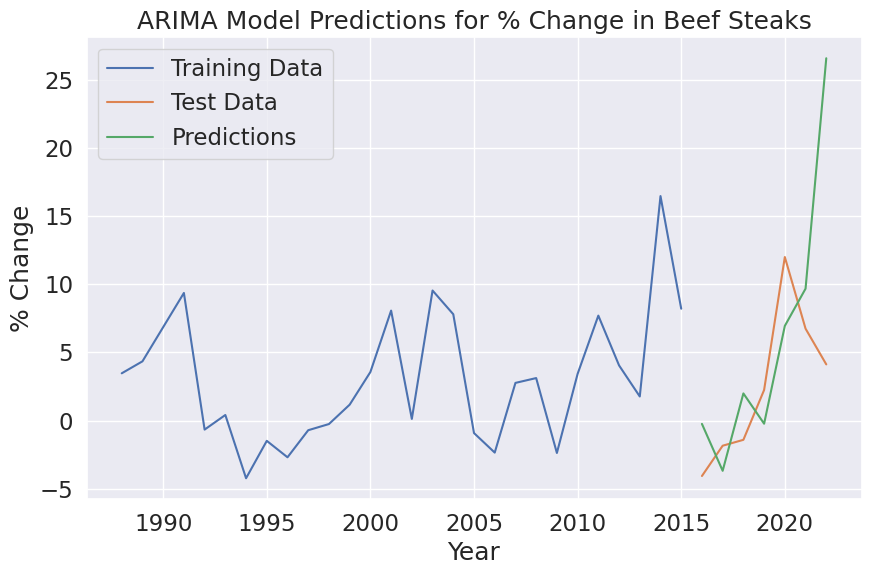

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['% change in beef steaks'], label='Training Data')
plt.plot(test_data.index, test_data['% change in beef steaks'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Model Predictions for % Change in Beef Steaks')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()








<ipython-input-57-6e0b4a10a554>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWa

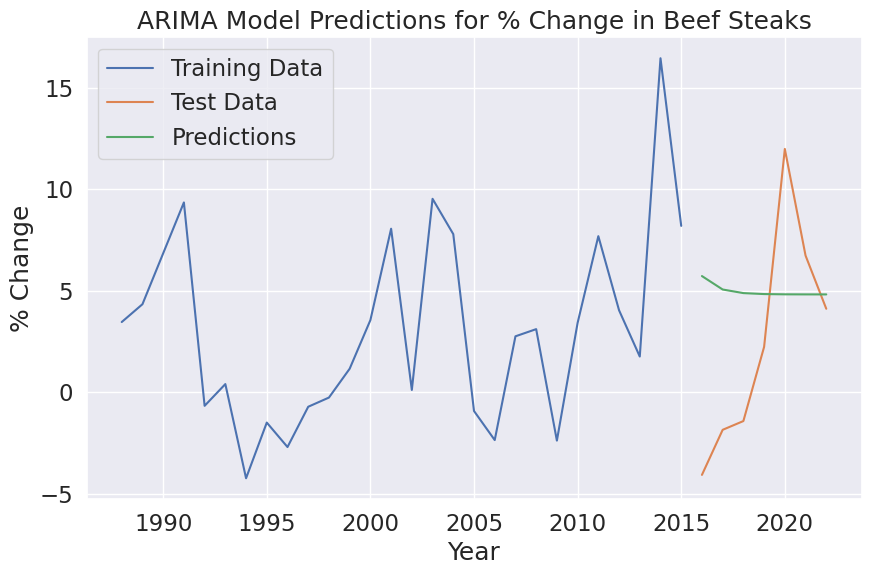

Forecast for 2023:
 27    5.726363
28    5.064476
29    4.887246
30    4.839790
31    4.827083
32    4.823680
33    4.822769
34    4.822525
35    4.822460
36    4.822443
37    4.822438
38    4.822437
Name: predicted_mean, dtype: float64

Forecast for 2024:
 39    4.822436
40    4.822436
41    4.822436
42    4.822436
43    4.822436
44    4.822436
45    4.822436
46    4.822436
47    4.822436
48    4.822436
49    4.822436
50    4.822436
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Create the subset dataframe
import statsmodels.api as sm
subset = trend_data[['%PPI for Beef', '%CPI for Animal Products', '% change in beef steaks', 'AnnualCPI', 'Annual Average Price For Beef Steaks', 'Inlflation %']]

# Fill any missing values with the previous value in the column
subset.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets
train_size = int(len(subset) * 0.8)
train_data, test_data = subset[:train_size], subset[train_size:]

# Create the ARIMA model
model = sm.tsa.ARIMA(train_data['% change in beef steaks'], order=(1,1,1))

# Fit the model to the training data
model_fit = model.fit()

# Generate predictions for the test set
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, typ='levels')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['% change in beef steaks'], label='Training Data')
plt.plot(test_data.index, test_data['% change in beef steaks'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Model Predictions for % Change in Beef Steaks')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()
# Forecast for 2023 and 2024
forecast_2023 = model_fit.forecast(steps=12)
forecast_2024 = model_fit.forecast(steps=24)[-12:]

# Print the forecasts
print("Forecast for 2023:\n", forecast_2023)
print("\nForecast for 2024:\n", forecast_2024)

<ipython-input-58-157c5a046b30>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: Use

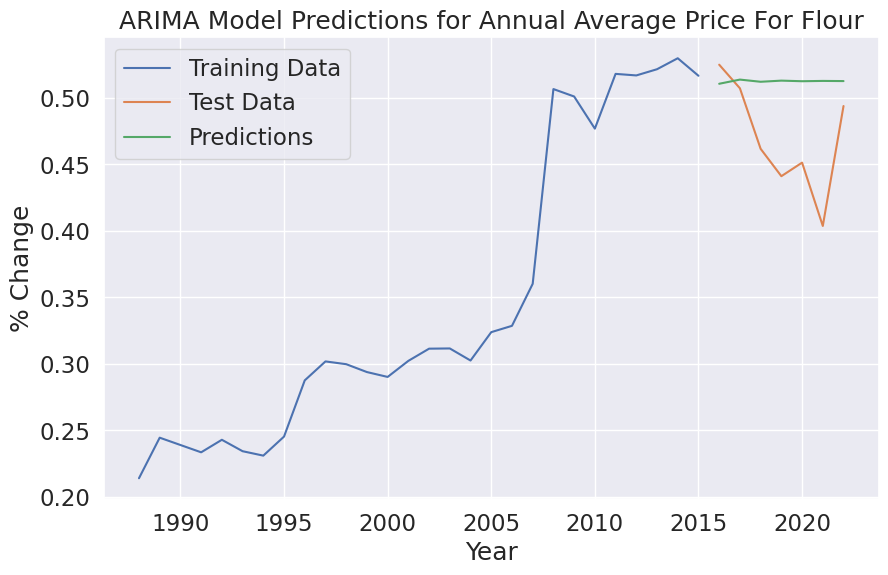

Forecast for 2023:
 27    0.510647
28    0.513788
29    0.512149
30    0.513005
31    0.512558
32    0.512791
33    0.512670
34    0.512733
35    0.512700
36    0.512717
37    0.512708
38    0.512713
Name: predicted_mean, dtype: float64

Forecast for 2024:
 39    0.512710
40    0.512712
41    0.512711
42    0.512711
43    0.512711
44    0.512711
45    0.512711
46    0.512711
47    0.512711
48    0.512711
49    0.512711
50    0.512711
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# Create the subset dataframe
import statsmodels.api as sm
subset = trend_data[['%PPI for Beef', '%CPI for Animal Products', '% change in beef steaks', 'AnnualCPI', 'Annual Average Price For Flour', 'Inlflation %']]

# Fill any missing values with the previous value in the column
subset.fillna(method='ffill', inplace=True)

# Split the data into training and testing sets
train_size = int(len(subset) * 0.8)
train_data, test_data = subset[:train_size], subset[train_size:]

# Create the ARIMA model
model = sm.tsa.ARIMA(train_data['Annual Average Price For Flour'], order=(1,1,1))

# Fit the model to the training data
model_fit = model.fit()

# Generate predictions for the test set
start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, typ='levels')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Annual Average Price For Flour'], label='Training Data')
plt.plot(test_data.index, test_data['Annual Average Price For Flour'], label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title('ARIMA Model Predictions for Annual Average Price For Flour')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()
# Forecast for 2023 and 2024
forecast_2023 = model_fit.forecast(steps=12)
forecast_2024 = model_fit.forecast(steps=24)[-12:]

# Print the forecasts
print("Forecast for 2023:\n", forecast_2023)
print("\nForecast for 2024:\n", forecast_2024)